In [7]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt


def trade_spider(max_pages):
    page = 1
    lista = []
    while page <= max_pages:
        url = 'https://sp.olx.com.br/regiao-de-bauru-e-marilia?o=' + str(page)
        
        source_cod = requests.get(url)
        plain_text = source_cod.text
        
        soup = BeautifulSoup(plain_text, "html5lib")
        
        for link in soup.findAll('p', {'class': 'detail-category'}):
            texto = link.contents[0]
            texto = texto.strip()
            lista.append(texto)
        page += 1
    return lista





lista = Counter(trade_spider(10))

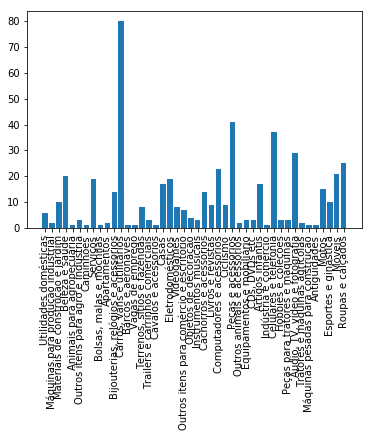

In [42]:

labels, values = zip(*lista.items())
indexes = np.arange(len(labels))
plt.bar(indexes, values, 0.8)
plt.xticks(indexes, labels, rotation='vertical')
plt.show()

